# Mss-windspeed

Explore the dependency of WSRA mean square slope on 10-m wind speed.

In [2]:
import os
from datetime import datetime, timezone

import cartopy
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pywsra
import xarray as xr
from matplotlib.animation import FuncAnimation, ArtistAnimation
from IPython.display import HTML
from scipy import stats

import plotting
from configure import read_stored_variable

## Setup

In [3]:
%run 'nb1-transform.ipynb'
%run -i configure.py

all_wsra_df = read_stored_variable('all_wsra_df')

plotting.configure_figures()

/Users/jacob/Programs/pywsra/src/pywsra/met.py:167: RuntimeWarning: Mean of empty slice
  values.append(resample_method(met_in_window[var].values))
/Users/jacob/Programs/pywsra/src/pywsra/met.py:167: RuntimeWarning: Mean of empty slice
  values.append(resample_method(met_in_window[var].values))
/Users/jacob/Programs/pywsra/src/pywsra/met.py:167: RuntimeWarning: Mean of empty slice
  values.append(resample_method(met_in_window[var].values))
/Users/jacob/Programs/pywsra/src/pywsra/met.py:167: RuntimeWarning: Mean of empty slice
  values.append(resample_method(met_in_window[var].values))
/Users/jacob/Programs/pywsra/src/pywsra/met.py:167: RuntimeWarning: Mean of empty slice
  values.append(resample_method(met_in_window[var].values))
/Users/jacob/Programs/pywsra/src/pywsra/met.py:167: RuntimeWarning: Mean of empty slice
  values.append(resample_method(met_in_window[var].values))


: 

In [10]:
def bin_mss_by_windspeed(wind_speed, mss, bin_width):
    max_bin = np.round(wind_speed.max(), -1)
    bin_means, bin_edges, binnumber \
        = stats.binned_statistic(wind_speed,
                                 mss,
                                 statistic='mean',
                                 bins=np.arange(10, max_bin, bin_width))
    bin_std = stats.binned_statistic(wind_speed,
                                       mss,
                                       statistic='std',
                                       bins=np.arange(10, max_bin, bin_width))[0]
    bin_width = (bin_edges[1] - bin_edges[0])
    bin_centers = bin_edges[1:] - bin_width/2
    return bin_means, bin_std, bin_centers, bin_edges


bin_means, bin_std, bin_centers, bin_edges \
    = bin_mss_by_windspeed(all_df['wind_speed'],
                           all_df['mss'],
                           bin_width=5)

(0.0, 50.0)

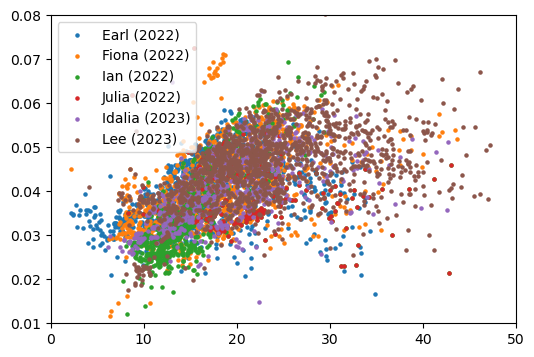

In [11]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(earl_ds['met_sfmr_10m_wind_speed'], earl_ds['sea_surface_mean_square_slope_median'], s=5, label='Earl (2022)')
ax.scatter(fiona_ds['met_sfmr_10m_wind_speed'], fiona_ds['sea_surface_mean_square_slope_median'], s=5, label='Fiona (2022)')
ax.scatter(ian_ds['met_sfmr_10m_wind_speed'], ian_ds['sea_surface_mean_square_slope_median'], s=5, label='Ian (2022)')
ax.scatter(julia_ds['met_sfmr_10m_wind_speed'], julia_ds['sea_surface_mean_square_slope_median'], s=5, label='Julia (2022)')
ax.scatter(idalia_ds['met_sfmr_10m_wind_speed'], idalia_ds['sea_surface_mean_square_slope_median'], s=5, label='Idalia (2023)')
ax.scatter(lee_ds['met_sfmr_10m_wind_speed'], lee_ds['sea_surface_mean_square_slope_median'], s=5, label='Lee (2023)')
ax.legend()
ax.set_ylim([0.01, 0.08])
ax.set_xlim([0, 50])


In [15]:
def cm_slick(wind_speed):
    mss_cross = 0.003 + 0.84 * 10**(-3) * wind_speed
    mss_up = 0.005 + 0.78 * 10**(-3) * wind_speed
    mss = 0.008 + 1.56 * 10**(-3) * wind_speed
    return mss, mss_up, mss_cross

def cm_clean(wind_speed):
    mss_cross = 0.003 + 1.92 * 10**(-3) * wind_speed
    mss_up = 0.000 + 3.16 * 10**(-3) * wind_speed
    mss = 0.003 + 5.12 * 10**(-3) * wind_speed
    return mss, mss_up, mss_cross

cm_wind_speed = np.linspace(2, 20, 20)
cm_mss_slick, cm_mss_up_slick, cm_mss_cross_slick = cm_slick(cm_wind_speed)
cm_mss_clean, cm_mss_up_clean, cm_mss_cross_clean = cm_clean(cm_wind_speed)

(5.0, 50.0)

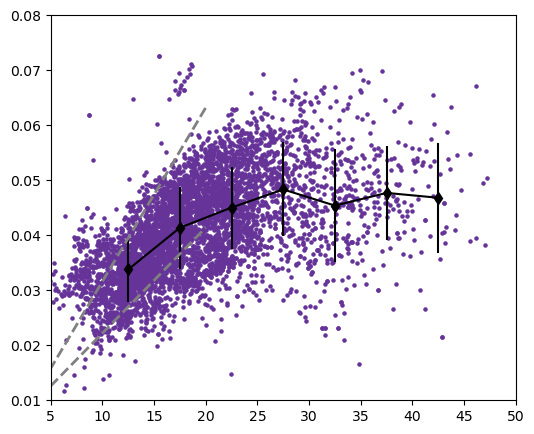

In [29]:
fig, ax = plt.subplots(figsize=(6, 5))
ax.scatter(all_df['wind_speed'], all_df['mss'], s=5, alpha=1, color='rebeccapurple')
ax.errorbar(bin_centers, bin_means, yerr=bin_std, color='k', marker='d')
# ax.scatter(cm_wind_speed, cm_mss_slick )
ax.plot(cm_wind_speed, cm_mss_cross_clean, color='grey', linestyle='--', linewidth=2, label='C&M crosswind')
ax.plot(cm_wind_speed, cm_mss_up_clean, color='grey', linestyle='--', linewidth=2, label='C&M upwind')
ax.set_ylim([0.01, 0.08])
ax.set_xlim([5,50])

Text(0.5, 0, 'SFMR 10-m wind speed (m/s)')

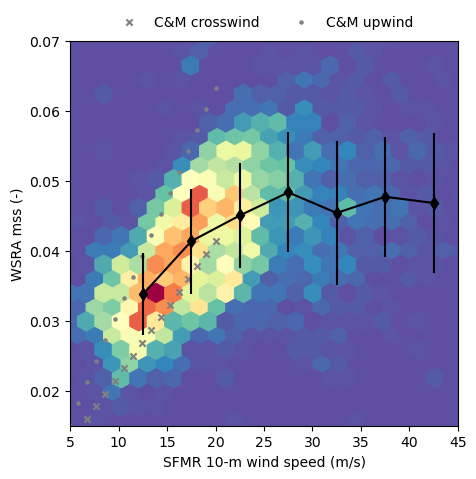

In [30]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.hexbin(all_df['wind_speed'], all_df['mss'], gridsize=(25, 15), cmap='Spectral_r')
ax.errorbar(bin_centers, bin_means, yerr=bin_std, color='k', marker='d')
# ax.scatter(cm_wind_speed, cm_mss_slick )
ax.scatter(cm_wind_speed, cm_mss_cross_clean, color='grey',  marker='x', s=20, label='C&M crosswind')
ax.scatter(cm_wind_speed, cm_mss_up_clean, color='grey', marker='.', s=20, label='C&M upwind')
ax.set_ylim([0.015, 0.07])
ax.set_xlim([5,45])
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=2, frameon=False)
ax.set_ylabel('WSRA mss (-)')
ax.set_xlabel('SFMR 10-m wind speed (m/s)')

#TODO: x and y labels, legend, colorbar, drop low wind speed hurricanes, more QC
#TODO: use wind error estimate as QC

In [31]:
#TODO: use an aggregation method/apply
mss_bins_by_storm = {}
for storm in storm_names:
    bin_means, bin_std, bin_centers, bin_edges \
    = bin_mss_by_windspeed(all_df.loc[storm, 'wind_speed'],
                           all_df.loc[storm, 'mss'],
                           bin_width=5)
    bins = {'mss_bin_means': bin_means,
            'mss_bin_stds': bin_std,
            'mss_bin_centers': bin_centers,
            'mss_bin_edges': bin_edges}
    mss_bins_by_storm[storm] = bins

mss_bins_by_storm = pd.DataFrame(mss_bins_by_storm).transpose()

(0.0, 50.0)

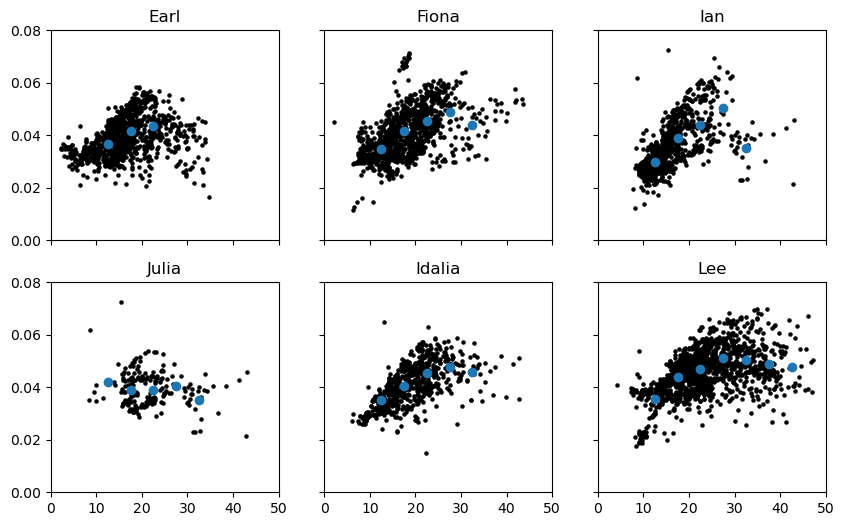

In [32]:
plt_kwargs = {'color':'k', 's':5}

fig, axes = plt.subplots(2, 3, figsize=(10, 6), sharex=True, sharey=True)
for storm, ax in zip(storm_names, axes.ravel()):
    ax.scatter(all_df.loc[storm, 'wind_speed'], all_df.loc[storm, 'mss'], **plt_kwargs)
    ax.scatter(mss_bins_by_storm.loc[storm, 'mss_bin_centers'], mss_bins_by_storm.loc[storm, 'mss_bin_means'])

    ax.set_title(storm)

ax.set_ylim([0.00, 0.08])
ax.set_xlim([0, 50])